# Mamdani - A fuzzy washing machine was developed

<p>The input is a membership of degree of soiled clothes from 0 - 100 (0- least soiled -> 100 most soiled)
<p>The output is the time to wash the cloths from 10 - 80 mins (10-minimum to 80 maximum).

### The following rules are to be followed.
<p>Rule - 1 : Less Soiled -> Less Time to wash
<p>Rule - 2 : More Soiled -> More time to wash

In [2]:
# Imports necessary modules/packages and sets up the environment for experimentation.
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload

# Navigate up to the project root directory dynamically.
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add the project root to the system path to import custom modules from mylibs package.
sys.path.append(project_root)


# Import the custom module from the mylibs package.
import mylibs.membership_functions as mf

# import mylibs.fuzzy_functions as ff

### 1. Design Membership Function
In this part, we design the membership (degree) function (no data yet).\
What happens?
1. x-axis is defined for the given scale in problem statement
2. y-axis is obtained using the membership function of choice

<b>Important</b>: If membership range goes wrong, the whole model can go wrong!

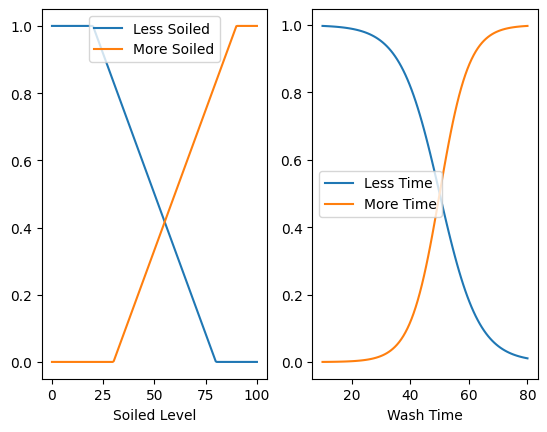

In [20]:
# Defines x-axis: scale of soiled levels from 0 to 100.
soiled = np.linspace(0, 100, 200)
# Defines y-axis for less soiled given x-axis.
less_s = np.array([mf.dec(x, 20, 80) for x in soiled])
# Defines y-axis for more soiled given x-axis.
more_s = np.array([mf.inc(x, 30, 90) for x in soiled])

# # Defines x-axis: scale of minutes from 10 to 80.
wash = np.linspace(10, 80, 100)
# Defines y-axis for less minutes given x-axis.
less_t = np.array([mf.sigmoid(x, -0.15, 50) for x in wash])
# Defines y-axis for more minutes given x-axis.
more_t = np.array([mf.sigmoid(x, 0.2, 50) for x in wash])

# Plots
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(soiled, less_s, label="Less Soiled")
plt.plot(soiled, more_s, label="More Soiled")
plt.xlabel("Soiled Level")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(wash, less_t, label="Less Time")
plt.plot(wash, more_t, label="More Time")
plt.xlabel("Wash Time")
plt.legend()

plt.show()

### 1. Fuzzification
An given input values is translated into fuzzy reading using the membership function defined previously

_E.g. Whether an input such as 40 is representing less soil or more soil linguistically_

__Observation__: 
- For one input value, two or more output can be produced though fuzification
- Hence, when input is 40, the membership degree of less-soil (at ~0.7) more-soil (at ~0.2) produced
- The membership of less-soiled is greater

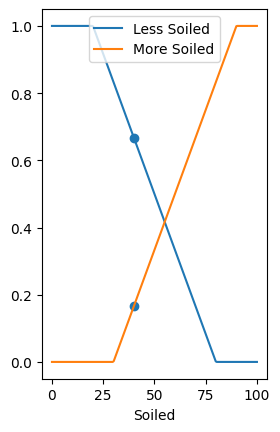

fuzzified in_less_s: 0.6666666666666667
fuzzified in_more_s: 0.16666666666666666


In [22]:
# Inputs needs to fuzzified using the membership functions defined above.
in_soiled = 40
in_less_s = mf.dec(in_soiled, 20, 80)
in_more_s = mf.inc(in_soiled, 30, 90)

plt.figure()
plt.subplot(1, 2, 1)
plt.plot(soiled, less_s, label="Less Soiled")
plt.plot(soiled, more_s, label="More Soiled")
plt.scatter([in_soiled, in_soiled], [in_less_s, in_more_s])
plt.xlabel("Soiled")
plt.legend()
plt.show()

# For instance, when the soiled is 40, it has a membership of 0.7 on less-soiled and 0.17 on more-soiled. More on less-soiled.
print(f"fuzzified in_less_s: {in_less_s}")
print(f"fuzzified in_more_s: {in_more_s}")

### 2. Rules
Must Do Composition with the Output - to evaluate the rules <p> 
A*B?? because R1 & R2 are matrices.

`np.fmin` - compares two arrays and returns a new array with the minima <a href=https://www.geeksforgeeks.org/python/numpy-fmin-in-python>Ref</a>

R1 = np.fmin(in_less_s,less_t) - compares ~0.7 with array and returns the minima

<p> Question: fmin returns minima and doesn't do max-min! So, how two matrices get composed?

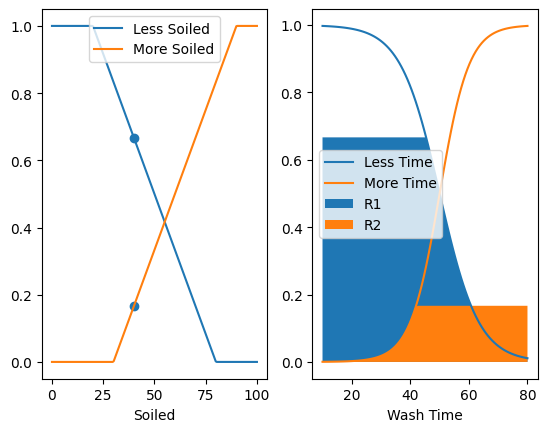

In [26]:
reload
# Rule - 1 : Less Soiled -> Less Time to wash
R1 = np.fmin(in_less_s, less_t)  # Max-Min Composition

# Rule - 2 : More Soiled -> More time to wash
R2 = np.fmin(in_more_s, more_t)

# Soiled
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(soiled, less_s, label="Less Soiled")
plt.plot(soiled, more_s, label="More Soiled")
plt.scatter([in_soiled, in_soiled], [in_less_s, in_more_s])
plt.xlabel("Soiled")
plt.legend()

# Wash Time
plt.subplot(1, 2, 2)
plt.plot(wash, less_t, label="Less Time")
plt.plot(wash, more_t, label="More Time")

# Rule outputs as lines
# plt.plot(wash, R1, label="R1")
# plt.plot(wash, R2, label="R2")

# Region fill
plt.fill_between(wash, R1, label="R1")
plt.fill_between(wash, R2, label="R2")
plt.xlabel("Wash Time")
plt.legend()

plt.show()
# From the graph observation, the less-time has more area than more-time.
# So, the final wash time should be less time.

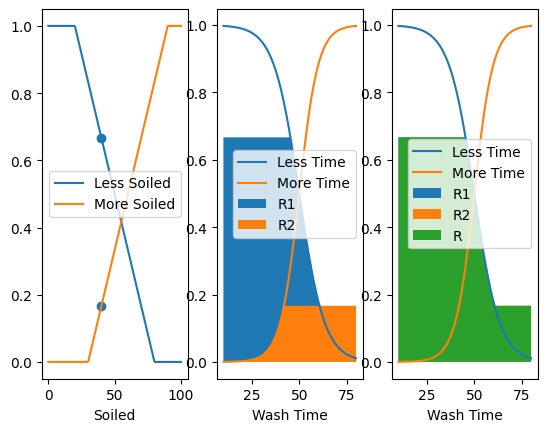

In [24]:
# Summarize the rule outputs
R = np.fmax(R1, R2)

# Soiled
plt.figure()
plt.subplot(1, 3, 1)
plt.plot(soiled, less_s, label="Less Soiled")
plt.plot(soiled, more_s, label="More Soiled")
plt.scatter([in_soiled, in_soiled], [in_less_s, in_more_s])
plt.xlabel("Soiled")
plt.legend()

# Wash Time
plt.subplot(1, 3, 2)
plt.plot(wash, less_t, label="Less Time")
plt.plot(wash, more_t, label="More Time")
plt.fill_between(wash, R1, label="R1")
plt.fill_between(wash, R2, label="R2")
plt.xlabel("Wash Time")
plt.legend()


# Final Output
plt.subplot(1, 3, 3)
plt.plot(wash, less_t, label="Less Time")
plt.plot(wash, more_t, label="More Time")

# Region R1 & R2 overwritten by R.
plt.fill_between(wash, R1, label="R1")
plt.fill_between(wash, R2, label="R2")
plt.fill_between(wash, R, label="R")
plt.xlabel("Wash Time")
plt.legend()

plt.show()

### 3. Defuzzification 
Centroid - centre of any random 2D object. Integral used for finding the centroid.<p>
R forms a regions (union of R1 & R2). So, centre point of R is the defuzzified answer!

Why Y-axis centroid not calculated?<p>
- Because Y-axis is membership and only X-axis is the value that is needed.

Expected Time :  36.25409039231756


/var/folders/yp/vdrm484933lg_mwhpd44s76h0000gn/T/ipykernel_18371/2869781794.py:1: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  res = np.trapz(R * wash, wash) / np.trapz(R, wash)


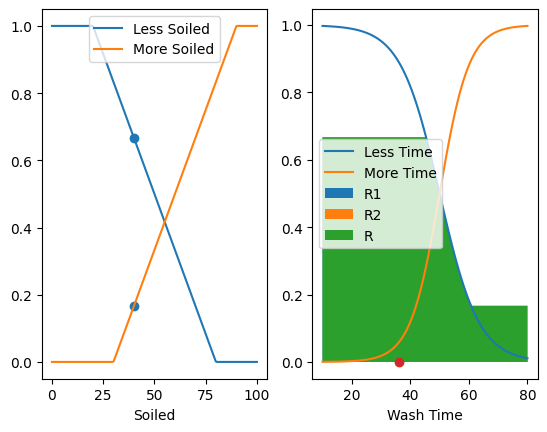

In [25]:
res = np.trapz(R * wash, wash) / np.trapz(R, wash)
print("Expected Time : ", res)

# Soiled
plt.figure()
plt.subplot(1, 2, 1)
plt.plot(soiled, less_s, label="Less Soiled")
plt.plot(soiled, more_s, label="More Soiled")
plt.scatter([in_soiled, in_soiled], [in_less_s, in_more_s])
plt.xlabel("Soiled")
plt.legend()

# Wash Time
plt.subplot(1, 2, 2)
plt.plot(wash, less_t, label="Less Time")
plt.plot(wash, more_t, label="More Time")
plt.fill_between(wash, R1, label="R1")
plt.fill_between(wash, R2, label="R2")
plt.fill_between(wash, R, label="R")
plt.scatter(res, 0)
plt.xlabel("Wash Time")
plt.legend()

plt.show()